# Plotting Sentinel-2 Data for Polsia in June 2020
With a focus upon NDMI and NDWI

In [92]:
import os
import glob
import rioxarray as rxr
import xarray as xr
import matplotlib as mpl
import matplotlib.pylab as plt
import numpy as np
import fiona
import earthpy.plot as ep
import rasterio
from affine import Affine
from rasterio.plot import show
from rasterio.merge import merge
from natsort import natsorted
%matplotlib inline

## Mosaic Visualisation Method

In [135]:
sentinel_b03_stack_path = "/Users/thomasdodd/Library/CloudStorage/OneDrive-MillfieldEnterprisesLimited/Cambridge/AI4ER/Lent/GTC/Sentinel/b3/*B03.tif"
sentinel_b08_stack_path = "/Users/thomasdodd/Library/CloudStorage/OneDrive-MillfieldEnterprisesLimited/Cambridge/AI4ER/Lent/GTC/Sentinel/b8/*B08.tif"
sentinel_b11_stack_path = "/Users/thomasdodd/Library/CloudStorage/OneDrive-MillfieldEnterprisesLimited/Cambridge/AI4ER/Lent/GTC/Sentinel/b11/*B11.tif"

In [136]:
sentinel_b03_stack = glob.glob(sentinel_b03_stack_path)
sentinel_b08_stack = glob.glob(sentinel_b08_stack_path)
sentinel_b11_stack = glob.glob(sentinel_b11_stack_path)

In [137]:
def reader_system(stack):
    src_files = []
    for geotif in stack:
        src = rasterio.open(geotif)
        src_files.append(src)
    return(src_files)

sentinel_b03_file_stack = reader_system(sentinel_b03_stack)
sentinel_b08_file_stack = reader_system(sentinel_b08_stack)
sentinel_b11_file_stack = reader_system(sentinel_b11_stack)

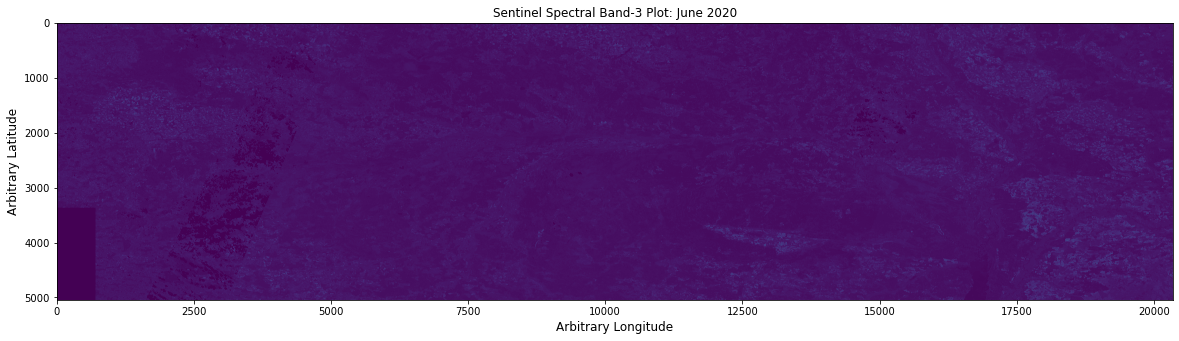

<AxesSubplot:title={'center':'Sentinel Spectral Band-3 Plot: June 2020'}, xlabel='Arbitrary Longitude', ylabel='Arbitrary Latitude'>

In [138]:
plt.close("all")
fig, ax = plt.subplots(figsize=(20,20))
mosaic, out_trans = rasterio.merge.merge(sentinel_b03_file_stack)
ax.set_title(label="Sentinel Spectral Band-3 Plot: June 2020")
ax.set_xlabel('Arbitrary Longitude',fontsize=12);
ax.set_ylabel('Arbitrary Latitude',fontsize=12);
show(mosaic)

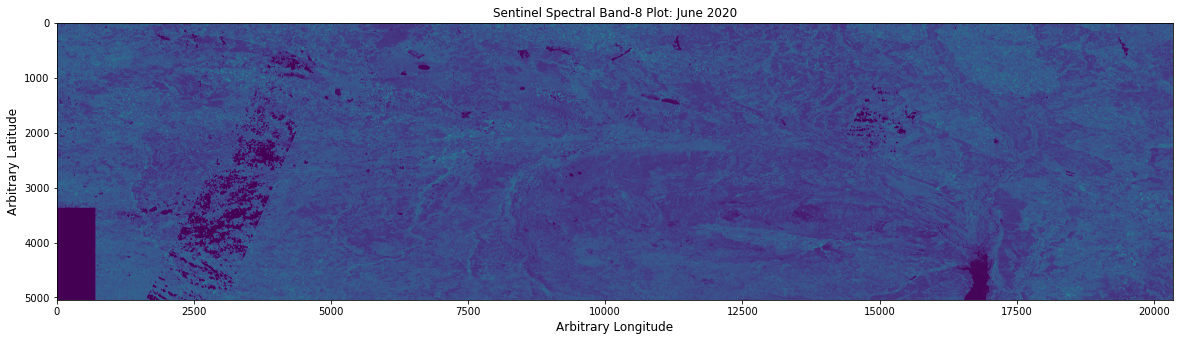

<AxesSubplot:title={'center':'Sentinel Spectral Band-8 Plot: June 2020'}, xlabel='Arbitrary Longitude', ylabel='Arbitrary Latitude'>

In [139]:
plt.close("all")
fig, ax = plt.subplots(figsize=(20,20))
mosaic, out_trans = rasterio.merge.merge(sentinel_b08_file_stack)
ax.set_title(label="Sentinel Spectral Band-8 Plot: June 2020")
ax.set_xlabel('Arbitrary Longitude',fontsize=12);
ax.set_ylabel('Arbitrary Latitude',fontsize=12);
show(mosaic)

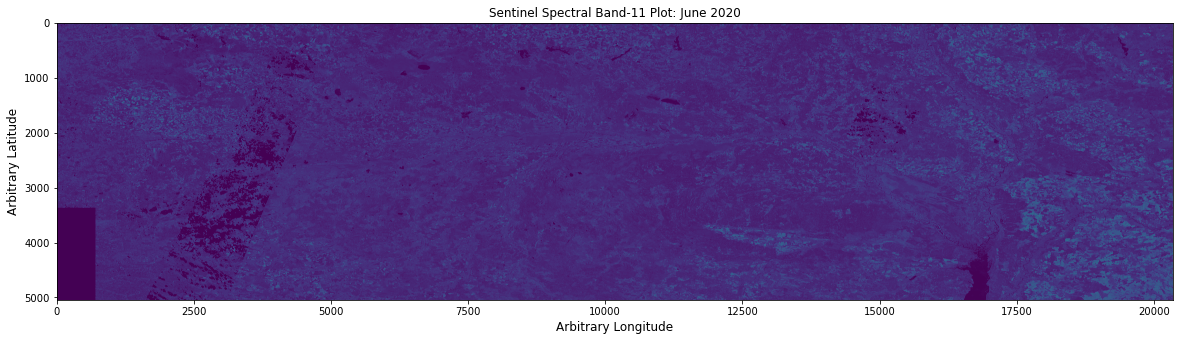

<AxesSubplot:title={'center':'Sentinel Spectral Band-11 Plot: June 2020'}, xlabel='Arbitrary Longitude', ylabel='Arbitrary Latitude'>

In [140]:
plt.close("all")
fig, ax = plt.subplots(figsize=(20,20))
mosaic, out_trans = rasterio.merge.merge(sentinel_b11_file_stack)
ax.set_title(label="Sentinel Spectral Band-11 Plot: June 2020")
ax.set_xlabel('Arbitrary Longitude',fontsize=12);
ax.set_ylabel('Arbitrary Latitude',fontsize=12);
show(mosaic)

## NDMI and NDWI Processing

In [99]:
sentinel_b03_filelist = os.listdir(sentinel_b03_stack_path[0:112])
sentinel_b08_filelist = os.listdir(sentinel_b08_stack_path[0:112])
sentinel_b11_filelist = os.listdir(sentinel_b11_stack_path[0:113])

sentinel_b03_filelist = natsorted(sentinel_b03_filelist)
sentinel_b08_filelist = natsorted(sentinel_b08_filelist)
sentinel_b11_filelist = natsorted(sentinel_b11_filelist)

['202006_2_B03.tif', '202006_3_B03.tif', '202006_4_B03.tif', '202006_5_B03.tif', '202006_6_B03.tif', '202006_7_B03.tif', '202006_8_B03.tif', '202006_9_B03.tif', '202006_10_B03.tif', '202006_11_B03.tif', '202006_12_B03.tif', '202006_13_B03.tif', '202006_14_B03.tif', '202006_15_B03.tif', '202006_16_B03.tif', '202006_17_B03.tif', '202006_18_B03.tif', '202006_19_B03.tif', '202006_20_B03.tif', '202006_21_B03.tif', '202006_22_B03.tif', '202006_23_B03.tif', '202006_24_B03.tif', '202006_25_B03.tif', '202006_26_B03.tif', '202006_27_B03.tif', '202006_28_B03.tif', '202006_29_B03.tif', '202006_30_B03.tif', '202006_31_B03.tif', '202006_32_B03.tif', '202006_33_B03.tif', '202006_34_B03.tif', '202006_35_B03.tif', '202006_36_B03.tif', '202006_37_B03.tif', '202006_38_B03.tif', '202006_39_B03.tif', '202006_40_B03.tif', '202006_41_B03.tif', '202006_42_B03.tif', '202006_43_B03.tif', '202006_44_B03.tif', '202006_45_B03.tif', '202006_46_B03.tif', '202006_47_B03.tif', '202006_48_B03.tif', '202006_49_B03.tif',

In [130]:
# NDMI Processing ndmi = b8-b11 / b8+b11
sentinel_b08_base_path = "/Users/thomasdodd/Library/CloudStorage/OneDrive-MillfieldEnterprisesLimited/Cambridge/AI4ER/Lent/GTC/Sentinel/b8/"
sentinel_b11_base_path = "/Users/thomasdodd/Library/CloudStorage/OneDrive-MillfieldEnterprisesLimited/Cambridge/AI4ER/Lent/GTC/Sentinel/b11/"

ndmi_base_path = "/Users/thomasdodd/Library/CloudStorage/OneDrive-MillfieldEnterprisesLimited/Cambridge/AI4ER/Lent/GTC/Sentinel/ndmi/"

k = 0
for _,__ in zip(sentinel_b08_filelist, sentinel_b11_filelist):
    b8_xr = rxr.open_rasterio(sentinel_b08_base_path + _, masked=True)
    b11_xr = rxr.open_rasterio(sentinel_b11_base_path + __, masked=True)
    ndmi_xr = xr.zeros_like(b8_xr)

    i = 0
    for _ in ndmi_xr.y.values:
        j = 0
        for __ in ndmi_xr.x.values:
            b8 = b8_xr.values[0, i, j]
            b11 = b11_xr.values[0, i, j]
            ndmi_xr[0, i, j] = b8 - b11 / b8 + b11
            j += 1
        i += 1
    
    ndmi_final_path = ndmi_base_path + "ndmi_" + str(k) + ".tif"
    ndmi_xr.rio.to_raster(ndmi_final_path)
    k += 1

### Visualisation Method

In [131]:
sentinel_ndmi_stack_path = "/Users/thomasdodd/Library/CloudStorage/OneDrive-MillfieldEnterprisesLimited/Cambridge/AI4ER/Lent/GTC/Sentinel/ndmi"

In [132]:
sentinel_ndmi_stack = glob.glob(sentinel_b03_stack_path)

In [133]:
def reader_system(stack):
    src_files = []
    for geotif in stack:
        src = rasterio.open(geotif)
        src_files.append(src)
    return(src_files)

sentinel_ndmi_file_stack = reader_system(sentinel_ndmi_stack)

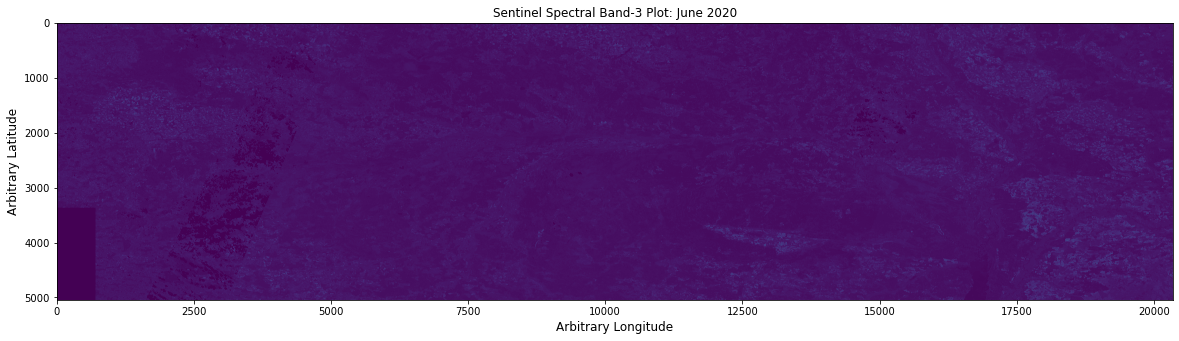

<AxesSubplot:title={'center':'Sentinel Spectral Band-3 Plot: June 2020'}, xlabel='Arbitrary Longitude', ylabel='Arbitrary Latitude'>

In [134]:
plt.close("all")
fig, ax = plt.subplots(figsize=(20,20))
mosaic, out_trans = rasterio.merge.merge(sentinel_ndmi_file_stack)
ax.set_title(label="Sentinel NDMI Plot: June 2020")
ax.set_xlabel('Arbitrary Longitude',fontsize=12);
ax.set_ylabel('Arbitrary Latitude',fontsize=12);
show(mosaic)